In [1]:
import os

import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATAFRAMES = os.path.join("..", "..", "..", "results", "dataframes", "")
FIGURES = os.path.join("..", "..", "..", "results", "figures", "")

# Data preprocessing

In [3]:
# Load data
df = pd.read_csv(os.path.join(DATAFRAMES, "dataframe-clean_invLE.csv"))
print(df.columns)

Index(['system', 'N', 'theta', 'embedding', 'mu', 't1', 't2', 'prob',
       'accuracy', 'auroc', 'pr', 'intercept', 'coef_distances',
       'coef_degrees'],
      dtype='object')


In [4]:
# Global subsets
df = df.query("t1 == 2.1")  # restrict to gamma = 2.1, t2 = 1.0 (default)

In [5]:
# Global transformations
df["relative_impact"] = np.abs(df["coef_distances"]) / np.abs(df["coef_degrees"])

In [6]:
# Melt for easier declarative plotting
df = df.melt(
    id_vars=["N", "embedding", "theta", "mu", "intercept", "coef_distances", "coef_degrees", "relative_impact"],
    value_vars=["accuracy", "auroc", "pr"],
    var_name="perftype", value_name="perfval"
).melt(
    id_vars=["N", "embedding", "theta", "mu", "perftype", "perfval"],
    value_vars=["intercept", "coef_distances", "coef_degrees", "relative_impact"],
    var_name="featuretype",
    value_name="featureval"
)

# Figures

## Performance

In [7]:
df_ = df.query("perftype == 'auroc'")
THETAS = sorted(df_["theta"].unique())
YMIN = df_["perfval"].min()

<Figure size 640x480 with 0 Axes>

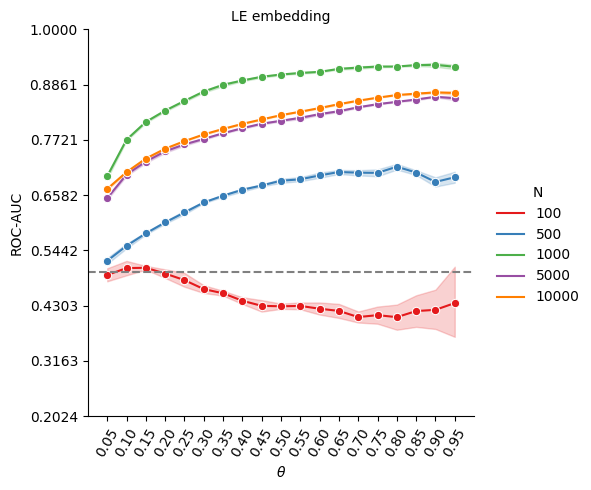

In [16]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_, kind="line",
    x="theta", y="perfval",
    hue="N", palette='Set1',
    col="embedding",
    marker="o",
)

# Adjust axes
## labels
g.set_axis_labels(r'$\theta$', 'ROC-AUC')
## ticks
g.tick_params(axis="x", labelrotation=60)
g.tick_params(axis="y", which="minor")
g.set(
    xlim=(0, 1), xticks=THETAS,
    ylim=(YMIN - 0.05, 1), yticks=np.linspace(YMIN - 0.05, 1.0, 8)
)

# Adjust subplots
g.set_titles(col_template="{col_name} embedding")

# Adjust figure
g.tight_layout()
(YMIN - 0.05 <= 0.5) and g.refline(y=0.5)

# Save to disk
# g.savefig(os.path.join(FIGURES, "figure_auroc-pfi_hue-mu_embedding-LE_data-LFR.png"), transparent=False, facecolor="white")

## Coefficients

In [56]:
df_coefs = df_.copy()
df_coefs = df_coefs.query("featuretype != 'relative_impact'")
df_coefs["featureval"] = df_coefs["featureval"].apply(lambda x: np.abs(x))
YMIN = 0
YMAX = df_coefs["featureval"].max()

<Figure size 640x480 with 0 Axes>

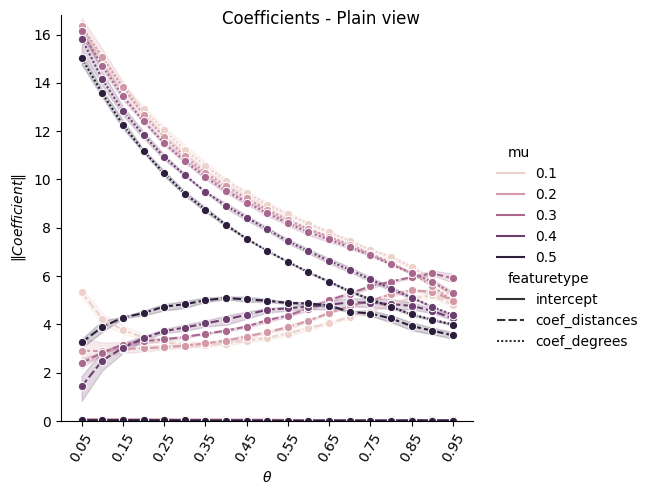

In [57]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_coefs, kind="line",
    x="theta", y="featureval",
    style="featuretype",
    hue="mu",
    marker="o"
)

# # Adjust axes
g.set_axis_labels(r'$\theta$', r'$\| Coefficient \|$')
g.tick_params(axis="x", labelrotation=60)
g.set(
    xlim=(0,1), xticks=THETAS[::2],
    ylim=(0, YMAX),
)

# Adjust subplots

# Adjust figure
g.tight_layout()
g.fig.suptitle("Coefficients - Plain view")

# Save to disk
g.savefig(os.path.join(FIGURES, "figure_coefs-pfi_hue-mu_style-feature_embedding-LE_data-LFR.png"), transparent=False, facecolor="white")

In [71]:
df_coefs = df_.copy()
df_coefs = df_coefs.query("featuretype == 'relative_impact'")
# df_coefs["featureval"] = df_coefs["featureval"].apply(lambda x: np.log(x))
YMIN = 0 #df_coefs["featureval"].min()
YMAX = df_coefs["featureval"].max()

<Figure size 640x480 with 0 Axes>

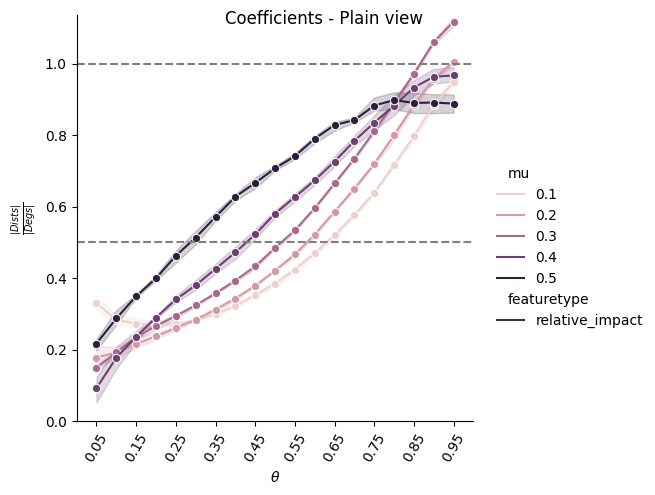

In [76]:
# Instantiate figure
plt.figure()

# Plot data
g = sns.relplot(
    data=df_coefs, kind="line",
    x="theta", y="featureval",
    style="featuretype",
    hue="mu",
    marker="o"
)

# Adjust axes
g.set_axis_labels(r'$\theta$', r'$\frac{|Dists|}{|Degs|}$')
g.tick_params(axis="x", labelrotation=60)
g.set(
    xlim=(0,1), xticks=THETAS[::2],
    ylim=(YMIN, YMAX),
)

# Adjust subplots
g.refline(y=0.5)
g.refline(y=1.)

# Adjust figure
g.tight_layout()
g.fig.suptitle("Coefficients - Plain view")

# Save to disk
g.savefig(os.path.join(FIGURES, "figure_coefs-relative-pfi_hue-mu_style-feature_embedding-LE_data-LFR.png"), transparent=False, facecolor="white")